<a href="https://www.kaggle.com/code/dwiahmad/contoh-fine-tuning?scriptVersionId=224018504" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.25
R-squared: 0.81


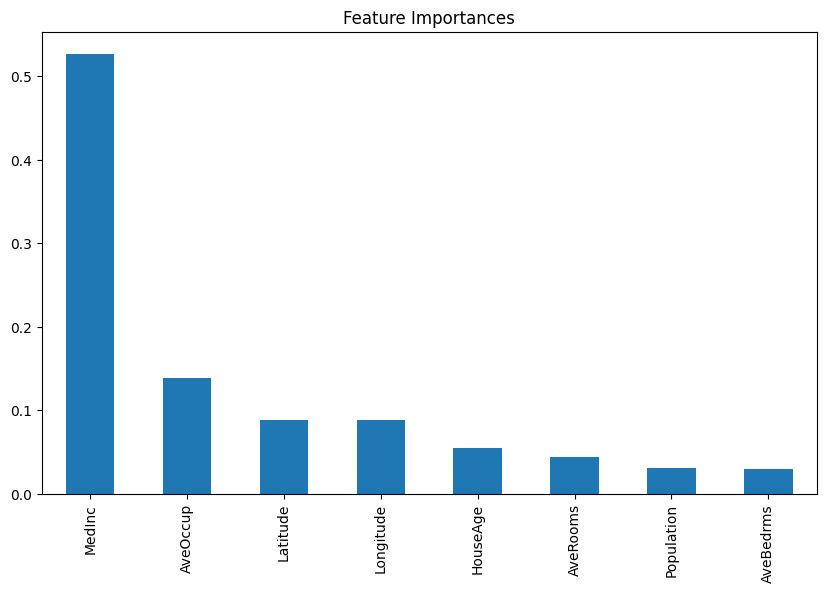

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params}')

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance visualization
feature_importances = pd.Series(best_model.feature_importances_, index=housing.feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importances')
plt.show()